### Laboratorium 5

Interpolacja

### Zadania
- Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na <a href="https://www.icsr.agh.edu.pl/~mownit/pdf/03_interpolation.pdf"> wielomian interpolacyjny  Lagrange'a </a>. Język implementacji do wyboru (Julia, C). Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. 

- Zrobic to samo dla metody <a href="https://www.icsr.agh.edu.pl/~mownit/pdf/03_interpolation.pdf"> Newtona (metoda ilorazów róznicowych)</a>. Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Jezyk implementacji wybrac taki sam, jak w poprzednim punkcie. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

- Zastosowac interpolację wielomianową z pakietu Polynomials (jesli wybralismy Julie) albo z 
funkcji <i> gsl_interp_polynomial</i> z pakietu <a href="https://www.gnu.org/software/gsl/doc/html/interp.html#">GSL</a> (jesli wybraliśmy C) do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

- Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego.  Narzedzie do analizy danych do wyboru (Julia, R)

- Poeksperymentowac z  interpolacją funkcjami sklejanymi (minimum dwie rozne funkcje sklejane),  narysowac wykresy i porownac z wykresami interpolacji wielomianowej. 

- Zademonstrowac  efekt Rungego. 

- Zbadać i zademonstrować podczas zajęc rózne algorytmy interpolacji stosowane w grafice komputerowej (np. do zmiany wielkości obrazu). Można korzystac z gotowych rozwiazań, ale trzeba wiedzieć, jak te algorytmy dzialaja. Do zaliczenia tego zadania potrzebne jest demonstracja i porownanie działania conajmniej dwóch metod.

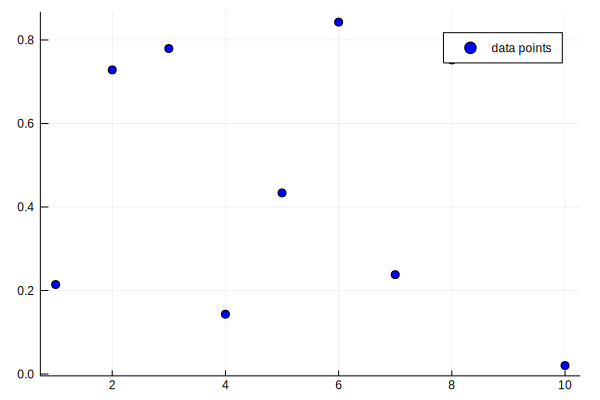

In [1]:
using Plots
n = 10.0
p =  1.0:n
X = [x for x in p]
Y = [rand() for x in X]
scatter(X, Y, label="data points", color = "blue")

In [3]:
X

10-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [4]:
Y

10-element Array{Float64,1}:
 0.21430191659166886 
 0.7282896355539092  
 0.7795016008435478  
 0.14327637316818653 
 0.43369180720713696 
 0.8427578844855417  
 0.2379765473371167  
 0.752236409976025   
 0.7853709386032428  
 0.020241308549319825

In [14]:
function Lagrange(X, Y, x_i, n)
    result = 0
    for i = 1:n
        y_i = Y[i]
        p_i = 0
        l_i = 1
        for j = 1:n
            if(j != i)
                l_i = l_i*(x_i-X[j])/(X[i]-X[j])                 
            end            
        end
        p_i = l_i * y_i
        result += p_i
    end
    result
end

Lagrange (generic function with 1 method)

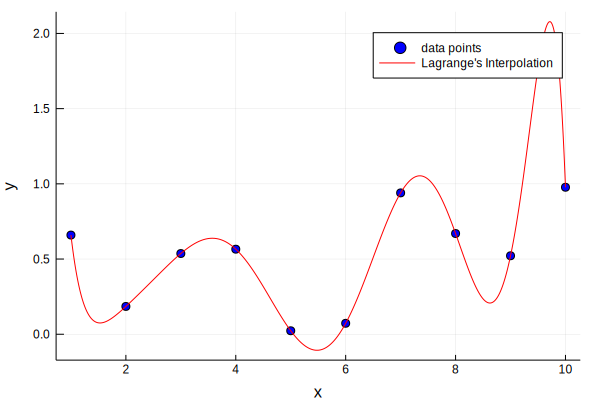

In [24]:
using Plots, Polynomials
n = 10

# wylosowanie węzłów interpolacji
p =  1.0:n

# zapisane współrzędnych x i y odpowiednio do tablicy X i Y
X = [x for x in p]
Y = [rand() for x in X]

# narysowanie na wykresie węzłów interpolacji
scatter(X, Y, label="data points", color = "blue", xlabel = "x", ylabel = "y")

# wylosowanie zagęszczonych punktów do rysowania wykresów funkcji interpolujacych
pd=1:0.01:n

# obliczenie wartości wielomianu interpolacyjnego dla wszystkich x z przedziału pd
# za pomocą funkcji Lagrange
L = [Lagrange(X, Y, x, n) for x in pd]

# narysowanie wielomianu interpolacyjnego na wykresie
plot!(pd, L, label = "Lagrange's Interpolation", color = "red")

In [9]:
# funkcja do obliczenia ilorazow roznicowych
function  dividedDiff(X, Y, i)
    n = length(X)
    F = zeros(n)
    for j=1:n-i
        F[j]=(Y[j+1, i+1] - Y[j, i+1])/(X[j+i] - X[j])
    end
    Y[:,2+i] = F
end

#funkcja do wyznaczenia macierzy wspolczynnikow
function Factors(X, Y)
    n = length(X)
    F = zeros(n, n+2)
    F[:,1] = X
    F[:,2] = Y
    for i=1:n
        dividedDiff(X, F, i)
    end
    return F
end

#funkcja do obliczania wartosci wielomianu interpolacyjnego
function Newton(C, x_i)
    result = C[1,2]
    n = length(C[:,1]) - 1
    for i=1:n
        product = C[1, i+2]
        for j=1:i
            product = product * (x_i - C[j,1])
        end
        result = result + product
    end
    return result
end  

Newton (generic function with 1 method)

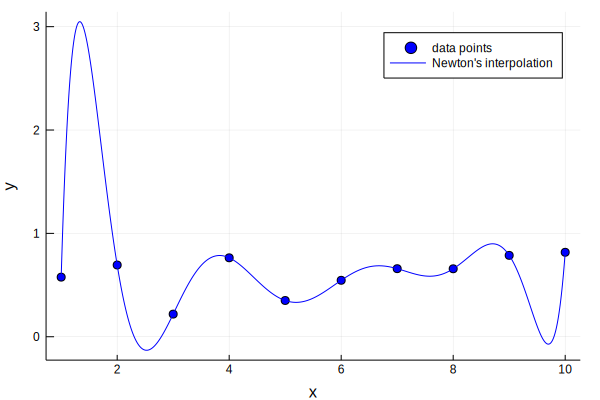

In [27]:
using Plots, Polynomials
n = 10

# wylosowanie węzłów interpolacji
p =  1.0:n

# zapisane współrzędnych x i y odpowiednio do tablicy X i Y
X = [x for x in p]
Y = [rand() for x in X]

# narysowanie na wykresie węzłów interpolacji
scatter(X, Y, label="data points", color = "blue", xlabel = "x", ylabel = "y")

# wylosowanie zagęszczonych punktów do rysowania wykresów funkcji interpolujacych
pd=1:0.01:n

# obliczenie wartości wielomianu interpolacyjnego dla wszystkich x z przedziału pd
# za pomocą funkcji Lagrange
C = Factors(X, Y)
N = [Newton(C, x) for x in pd]

# # narysowanie wielomianu interpolacyjnego na wykresie
#plot!(pd, L, label = "Lagrange's Interpolation", color = "red")
plot!(pd, N, label = "Newton's interpolation", color = "blue")

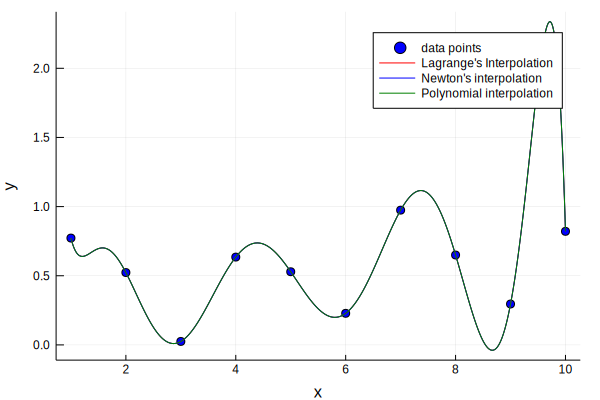

In [23]:
#Pkg.add("Interpolations")
using Plots, Polynomials
n = 10

# wylosowanie węzłów interpolacji
p =  1.0:n

# zapisane współrzędnych x i y odpowiednio do tablicy X i Y
X = [x for x in p]
Y = [rand() for x in X]

# narysowanie na wykresie węzłów interpolacji
scatter(X, Y, label="data points", color = "blue", xlabel = "x", ylabel = "y")

# wylosowanie zagęszczonych punktów do rysowania wykresów funkcji interpolujacych
pd=1:0.01:n

# obliczenie wartości wielomianu interpolacyjnego dla wszystkich x z przedziału pd
# za pomocą funkcji Lagrange
L = [Lagrange(X, Y, x, n) for x in pd]

# za pomocą funkcji Newton
C = Factors(X, Y)
N = [Newton(C, x) for x in pd]

# narysowanie wielomianow interpolacyjnych na wykresie
plot!(pd, L, label = "Lagrange's Interpolation", color = "red")
plot!(pd, N, label = "Newton's interpolation", color = "blue")

fit1=polyfit(p, Y)
P = [fit1(x) for x in pd]
plot!(pd, P, label = "Polynomial interpolation", color = "green")


In [32]:
using DataFrames, Polynomials
Dim = Int[]
Time = Float64[]
Type = []
for n = 10:50
    for i = 1:10
        p =  1.0:n
        X = [x for x in p]
        Y = [rand() for x in X]
        pd=1:0.01:n
        
        push!(Dim, n)
        push!(Type, "L")
        L = [Lagrange(X, Y, x, n) for x in pd]
        push!(Time, @elapsed L)
        
        push!(Dim, n)
        push!(Type, "N")
        C = Factors(X, Y)
        N = [Newton(C, x) for x in pd]
        push!(Time, @elapsed N)

        push!(Dim, n)
        push!(Type, "P")
        fit1=polyfit(p, Y)
        P = [fit1(x) for x in pd]
        push!(Time, @elapsed P)
    end    
end

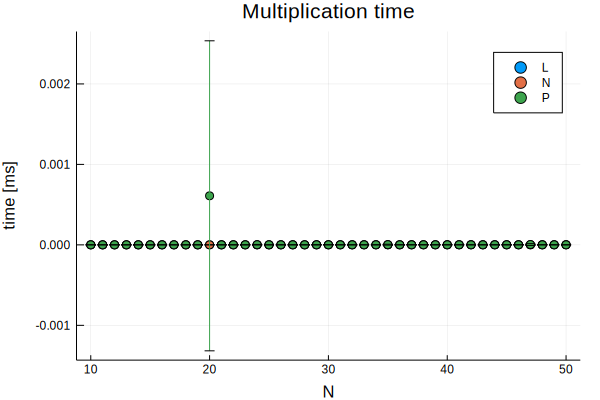

In [33]:
using DataFrames, Statistics, Plots

data = DataFrame()
data[:Dim] = Dim
data[:Type] = Type
data[:Time] = Time

time_df = by(data, [:Dim,:Type], avgTime = :Time => mean, stdDev = :Time => std)

p=scatter(time_df[:Dim],time_df[:avgTime],group=time_df[:Type],
    title="Multiplication time",yerr=time_df[:stdDev],xlabel="N",ylabel="time [ms]",legend=true)

plot(p)

In [ ]:
Efekt Rungego

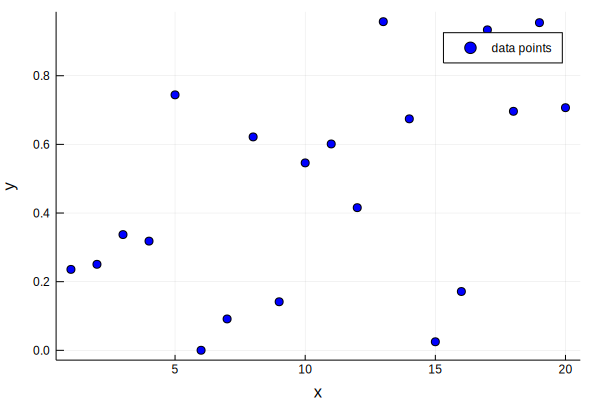

In [34]:
using Plots, Polynomials
# wylosowanie węzłów interpolacji
n = 20
p =  1:1:n

# zapisane współrzędnych x i y odpowiednio do tablicy X i Y
X = [x for x in p]
Y = [rand() for x in X]

scatter(X, Y, label="data points", color = "blue", xlabel = "x", ylabel = "y")

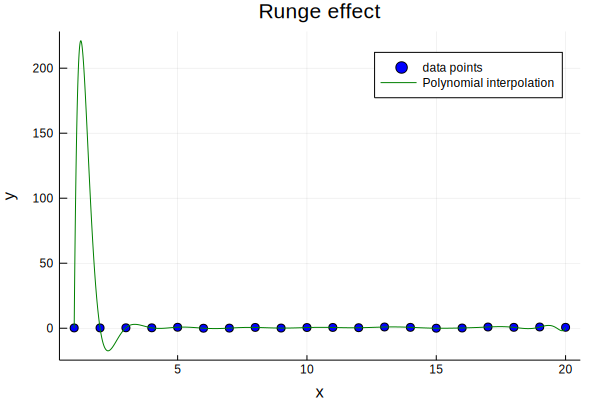

In [35]:
# wylosowanie zagęszczonych punktów do rysowania wykresów funkcji interpolujacych
pd=1:0.01:n
fit1=polyfit(p, Y)
P = [fit1(x) for x in pd]
plot!(pd, P, title = "Runge effect", label = "Polynomial interpolation", color = "green")